<a href="https://colab.research.google.com/github/napolitanodst/Apprenticeship-log/blob/Apprenticeship-Code/Geo_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install split-folders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
# Packages
import tensorflow as tf
from tensorflow import keras
import os
import zipfile
import pandas as pd
import splitfolders

In [3]:
# Importing delle immagini del dataset
zip_ref = zipfile.ZipFile('/content/drive/MyDrive/dataset.zip', 'r') 
zip_ref.extractall('/tmp') 
zip_ref.close()

In [4]:
# Ridimensionamento delle immagini
import PIL
from PIL import Image
i = r'/tmp/dataset/Sedimentarie'
for file in os.listdir(i):
    i_img = i+"/"+file
    img = Image.open(i_img)
    img = img.resize((384,306))
    img.save(i_img)
q = r'/tmp/dataset/Metamorfiche'
for file in os.listdir(q):
    q_img = q+"/"+file
    img = Image.open(q_img)
    img = img.resize((384,306))
    img.save(q_img)
k = r'/tmp/dataset/Vulcaniche'
for file in os.listdir(k):
    k_img = k+"/"+file
    img = Image.open(k_img)
    img = img.resize((384,306))
    img.save(k_img)


In [5]:
# Splitting in train, validation set
input = '/tmp/dataset'
output = '/tmp/prova'

splitfolders.ratio(input, output=output, seed=1337,ratio=(.7,.3), group_prefix=None)

Copying files: 210 files [00:00, 3062.77 files/s]


In [6]:
# Creazione Datasets
cartella = "/tmp/prova/train"
train= tf.keras.utils.image_dataset_from_directory(
             cartella,
             image_size= (384,306)                              
)

cartella2 = "/tmp/prova/val"
val= tf.keras.utils.image_dataset_from_directory(
             cartella2,
             image_size= (384,306)      
)      



Found 146 files belonging to 3 classes.
Found 64 files belonging to 3 classes.


In [7]:
# Modello (LeNet5 like)
model = tf.keras.models.Sequential(
    [
    tf.keras.layers.Conv2D(6, 5, activation="relu"),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(16, 5, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(len(train.class_names), activation="softmax")
    ]
)

In [8]:
training=model.compile(
             optimizer=tf.keras.optimizers.Adam(),
             loss=tf.keras.losses.SparseCategoricalCrossentropy(),
             metrics=["accuracy"]
)

In [9]:
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_accuracy',patience=5)


In [10]:
#Fitting
history = model.fit(
                    train,
                    validation_data=val,
                    epochs=50,
                    callbacks= [early_stopping]
)

Epoch 1/50
5/5 [==============================] - 12s 276ms/step - loss: 2000.2802 - accuracy: 0.3562 - val_loss: 2010.9587 - val_accuracy: 0.3281
Epoch 2/50
5/5 [==============================] - 1s 108ms/step - loss: 944.7655 - accuracy: 0.3082 - val_loss: 390.9977 - val_accuracy: 0.2969
Epoch 3/50
5/5 [==============================] - 1s 128ms/step - loss: 394.3738 - accuracy: 0.3356 - val_loss: 135.2186 - val_accuracy: 0.5312
Epoch 4/50
5/5 [==============================] - 1s 214ms/step - loss: 74.9186 - accuracy: 0.5274 - val_loss: 80.9259 - val_accuracy: 0.5156
Epoch 5/50
5/5 [==============================] - 1s 219ms/step - loss: 20.3824 - accuracy: 0.6849 - val_loss: 23.8166 - val_accuracy: 0.5312
Epoch 6/50
5/5 [==============================] - 1s 104ms/step - loss: 1.1594 - accuracy: 0.8699 - val_loss: 12.1805 - val_accuracy: 0.3594
Epoch 7/50
5/5 [==============================] - 1s 100ms/step - loss: 0.4655 - accuracy: 0.8699 - val_loss: 9.4177 - val_accuracy: 0.3125


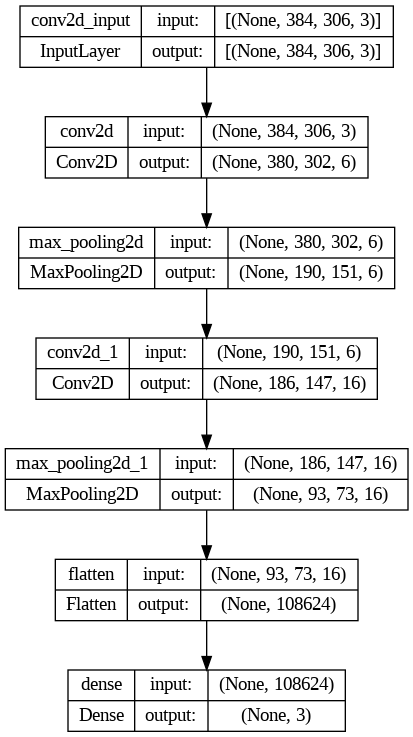

In [11]:
keras.utils.plot_model(model, show_shapes=True)

<Axes: >

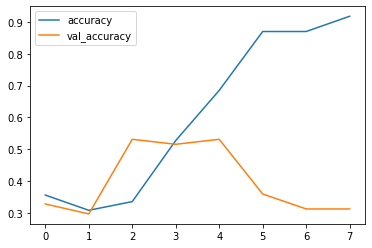

In [12]:
#Plot di accuracy e val accuracy
pd.DataFrame(history.history)[["accuracy","val_accuracy"]].plot()